In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
import scipy.stats as stats


import numpy as np

Matplotlib is building the font cache; this may take a moment.


## Data

La base de données contient des informations sur des individus qui habitent aux Etats-Unis et le montant facturé par l'assurance.

In [44]:
data = pd.read_csv("insurance.csv")

data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <BarContainer object of 10 artists>)

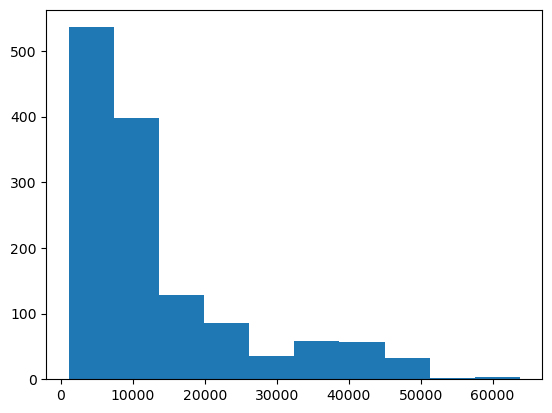

In [45]:
plt.hist(data['charges'])

(array([ 46., 105., 101., 155., 198., 283., 156., 123., 115.,  56.]),
 array([ 7.02275569,  7.42678461,  7.83081352,  8.23484244,  8.63887136,
         9.04290027,  9.44692919,  9.8509581 , 10.25498702, 10.65901594,
        11.06304485]),
 <BarContainer object of 10 artists>)

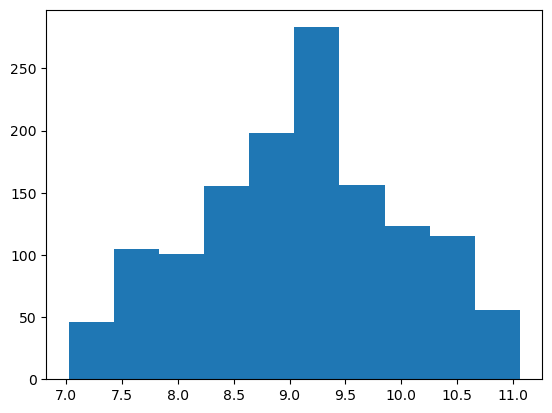

In [46]:
plt.hist(np.log(data['charges']))

In [49]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Hypothèse

Notre variable dépendante est le montant facturé par l'assurance à chaque individu. 
On observe que le logarithme des valeurs des montants de facturé par l'assurance suit une distribution normale.

On va construire un modèle GLM qui suit une distribution normale mais avec une fonction de lien 'log'

## Pipeline

In [50]:
train_X = data.drop('charges',axis=1).iloc[:1000]
train_Y = data['charges'].iloc[:1000]

test_X = data.drop('charges',axis=1).iloc[1000:]
test_Y = data['charges'].iloc[1000:]

In [8]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [9]:
numerical_features = ['age','bmi','children']
categorical_features = ['sex','smoker','region']

In [10]:
numerical_pipeline = make_pipeline(SimpleImputer(),
                                      StandardScaler())
categorical_pipeline = make_pipeline(SimpleImputer(strategy='most_frequent'),
                                        OneHotEncoder(handle_unknown='ignore'))


In [11]:
preprocessor = make_column_transformer((numerical_pipeline,numerical_features),
                                       (categorical_pipeline,categorical_features))

In [41]:
model = Pipeline(
    [
        ('preprocessor', preprocessor),
        ('regressor', linear_model.TweedieRegressor(power=0, link='log'))
    ]
)

model.fit(train_X,train_Y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'bmi', 'children']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['sex', 'smoker',
                                                   'region'])])),
                ('regressor', TweedieRegressor(link='log', power=0))])

In [42]:
model.score(test_X,test_Y)


0.7742402576585006

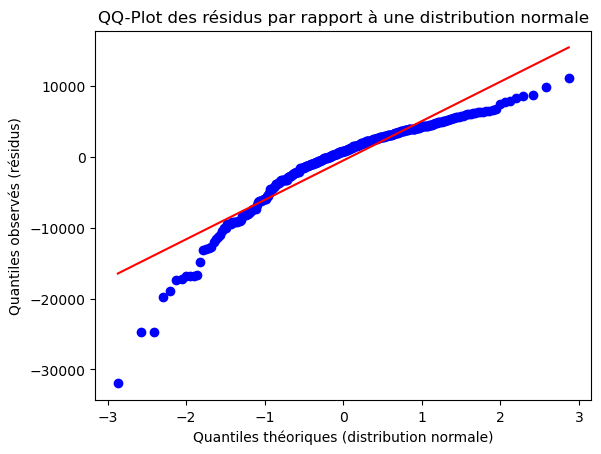

In [38]:
import numpy as np
import matplotlib.pyplot as plt

residus = poisson_model.predict(test_X) - test_Y 

stats.probplot(residus, dist='norm', plot=plt)
plt.title("QQ-Plot des résidus par rapport à une distribution normale")
plt.xlabel("Quantiles théoriques (distribution normale)")
plt.ylabel("Quantiles observés (résidus)")
plt.show()
